# Physical Models of Living Systems
## Homework5
### Maryam Feizi - 2091504

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

### Wilson-Cowan Models
 The Wilson-Cowan model is a mathematical model used to describe the dynamics of interacting populations of excitatory and inhibitory neurons in the brain. We can write two states as the following:
 $$
\begin{aligned}
& \frac{\mathrm{d} x}{\mathrm{~d} t}=-\alpha_{E} x+f\left(s_{E I}\right) \\
& \frac{\mathrm{d} y}{\mathrm{~d} t}=-\alpha_{I} y+f\left(s_{I E}\right)
\end{aligned}
$$
where $\alpha_{E / I}$ model the relaxation time for both kinds of neurons, $f$ is the activation function, and:

$$
\begin{aligned}
& s_{E I}=w_{E E} x-w_{E I} y+h_{E} \\
& s_{I E}=w_{I E} x-w_{I I} y+h_{I}
\end{aligned}
$$

Let's consider a continuous activation function, for example the sigmoid:

$$
f(s)=\frac{1}{1+e^{-s}}
$$

In particular, we consider two possible reactions: activation and inhibition. Denoting with $\Phi$ a deactivated neuron, we have:

$$
\begin{aligned}
& \Phi \stackrel{f\left(s_{y}\right)}{\longrightarrow} x \quad , \quad
& \Phi \stackrel{f\left(s_{x}\right)}{\longrightarrow} y
\end{aligned}
$$

for the activation, and:

$$
\begin{aligned}
& x \stackrel{\alpha_{E}}{\longrightarrow} \Phi \quad , \quad
& y \stackrel{\alpha_{I}}{\longrightarrow} \Phi
\end{aligned}
$$

for the inhibition. Note that the transition rates for the activation are given by the activation function, with argument:

$$
s_{y}=-r\left(\frac{n_{y}}{V}-\frac{1}{2}\right) \quad , \quad s_{x}=r\left(\frac{n_{x}}{V}-\frac{1}{2}\right)
$$

where $V$ is the volume occupied by each population of neurons.

The transition rates for each state then become:

$$
T\left(n_{x} \rightarrow n_{x-1}\right)=n_{x} \quad , \quad T\left(n_{x} \rightarrow n_{x+1}\right)=f\left(s_{y}\right)
$$

$$
T\left(n_{y} \rightarrow n_{y-1}\right)=n_{y} \quad , \quad T\left(n_{y} \rightarrow n_{y+1}\right)=f\left(s_{x}\right)
$$
In terms of the continuous variables

$$
x=\frac{n_{x}}{V} \quad , \quad y=\frac{n_{y}}{V}
$$

Using the Kramers-Moyal expansion we get first a Fokker-Plank equation and then the corresponding Langevin equation:

$$
\left\{\begin{array}{l}
\dot{x}=-x+f\left(-r\left(y-\frac{1}{2}\right)\right)+\frac{1}{\sqrt{V}} \sqrt{x+f\left(-r\left(y-\frac{1}{2}\right)\right)} \eta_{x} \\
\dot{y}=-y+f\left(r\left(x-\frac{1}{2}\right)\right)+\frac{1}{\sqrt{V}} \sqrt{y+f\left(r\left(x-\frac{1}{2}\right)\right)} \eta_{y}
\end{array}\right.
$$

where $\eta_{x}$ and $\eta_{y}$ are the white noise terms:

$$
\left\langle\eta_{x}\right\rangle=\left\langle\eta_{y}\right\rangle=0 \quad , \quad \left\langle\eta_{x} \eta_{y}\right\rangle=\delta(x-y)
$$

In the thermodynamic limit $V \rightarrow \infty$, the system becomes deterministic, with a fixed point given by:

$$
x^{*}=y^{*}=\frac{1}{2}
$$

The Jacobian at the equilibrium evaluates to:

$$
\left.J\right|_{x^{*}, y^{*}}=\left(\begin{array}{cc}
-1 & -r / 4 \\
r / 4 & -1
\end{array}\right)
$$

with eigenvalues $\lambda=-1 \pm i r / 4$. Since the real part is negative, the equilibrium is stable.
However, for a finite $V$, the stochastic oscillations are non-zero. Moreover, the ones at a certain frequency get amplified, meaning that we expect to see sustained oscillations around the stable equilibrium in the stochastic case.

We can show this by linearly approximating noise (Linear Noise Approximation) and performing a Van-Kampen expansion:

$$
\begin{aligned}
& x(t)=x^{*}+\frac{1}{\sqrt{V}} \xi_{1} \\
& y(t)=y^{*}+\frac{1}{\sqrt{V}} \xi_{2}
\end{aligned}
$$

The linearized system becomes:

$$
\left\{\begin{array}{l}
\dot{\xi}_{1}=J_{11} \xi_{1}+J_{12} \xi_{2}+\mu_{1} \\
\dot{\xi}_{2}=J_{21} \xi_{1}+J_{22} \xi_{2}+\mu_{2}
\end{array}\right.
$$
where $\mu_{1}$ and $\mu_{2}$ are white Gaussian noise, with $\left\langle\mu_{1}\right\rangle=\left\langle\mu_{2}\right\rangle=0$, and $\left\langle\mu_{i}^{(\tau)} \mu_{j}^{(\tau)}\right\rangle=$ $\delta(t-\tau) B_{i j}$ with $B_{i j}=\sigma^{2} \delta_{i j}$.

To search for the frequency of sustained oscillations, we perform a Fourier transformation:
$$
\left\{\begin{array}{l}
\tilde{\xi}_{1}(\omega)=\Phi_{11}^{-1} \tilde{\xi}_{1}+\Phi_{12}^{-1} \tilde{\xi}_{2} \\
\tilde{\xi}_{2}(\omega)=\Phi_{12}^{-1} \tilde{\xi}_{1}+\Phi_{22}^{-1} \tilde{\xi}_{2}
\end{array}\right.
$$

with $\Phi_{i j}=-J_{i j}-i \omega \delta_{i j}$. This can be solved for $\tilde{\xi}_{1}$ and $\tilde{\xi}_{2}$. Then, the power spectrum is defined as:

$$
P_{i}(\omega)=\left\langle\tilde{\xi}_{i}(\omega) \tilde{\xi}_{i}^{*}(\omega)\right\rangle=\sum_{l=1}^{2} \sum_{m=1}^{2} \Phi_{i l}^{-1}(\omega) \delta_{l m}\left(\Phi^{\dagger}(\omega)\right)_{m i}^{-1}
$$
and it has (as expected) a peak around a $\omega_{0}$ frequency, which is the one that resonates with the deterministic oscillation one.

In [3]:
# differential equation
def equations(vars):
    
    x , y = vars
    eq1 = - x + f(S_EI(x , y))
    eq2 = - y + f(S_IE(x , y))
    
    return [eq1 , eq2]
# activation function that we assume it is sigmoid
def f(s):
    
    return 100 / (1 + np.exp(-s))
# first deviation of sigmoid
def f_prime(s):
    
    return f(s) **2 * np.exp(-s)/100
    
def S_EI( x , y):
    
    return w_ee * x - w_ei * y + h_e

def S_IE ( x , y):
    
    return w_ie * x - w_ii * y + h_i

In [5]:
def trajectory(vars , t):
    
    x , y = vars
    eq1 = - x + f(S_EI(x , y))
    eq2 = - y + f(S_IE(x , y))
    
    return [eq1 , eq2]

# Jacobian
def Jacobian(x_star , y_star):
    
    return np.array([[-1 + w_ee * f_prime(S_EI(x_star , y_star)) , -1 * f_prime(S_EI(x_star , y_star)) * w_ei] , 
                    [f_prime(S_IE(x_star , y_star)) * w_ie , -1 + f_prime(S_IE(x_star , y_star)) * -1 * w_ii ]])

In [8]:
initial_guess = [0 , 0]
solution = fsolve(equations, initial_guess)
x_star , y_star = solution

print(x_star , y_star)

30.232967661286132 22.57547626818976


Let's now compute Jacobian

In [11]:
J = Jacobian(x_star , y_star)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(J)

# Find the index of the largest eigenvalue
max_eigenvalue_index = np.argmax(eigenvalues)

# Get the largest eigenvalue
largest_eigenvalue = eigenvalues[max_eigenvalue_index]

# Get the corresponding eigenvector
largest_eigenvector = eigenvectors[:, max_eigenvalue_index]

# Extract the real and imaginary parts
real_part = np.real(largest_eigenvalue)
imaginary_part = np.imag(largest_eigenvalue)


print("Largest Eigenvalue:", largest_eigenvalue)
print("Real Part:", real_part)
print("Imaginary Part:", imaginary_part)

Largest Eigenvalue: (-1+7.163790294172663j)
Real Part: -1.0
Imaginary Part: 7.163790294172663


In [12]:
initial_conditions = [10, 10]  # Example initial conditions
time_points = np.linspace(0, 10, 1000)  # Example time points
solution = odeint(trajectory, initial_conditions, time_points)

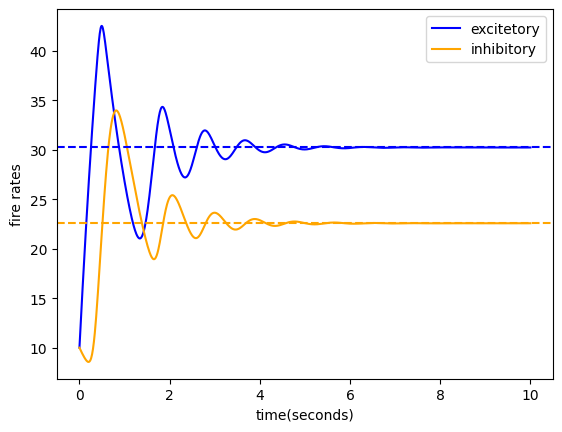

In [13]:
plt.plot(time_points, solution[:, 0], label='excitetory',color = 'blue' )
plt.plot(time_points, solution[:, 1], label='inhibitory',color = 'orange' )
plt.xlabel('time(seconds)')
plt.ylabel('fire rates')
plt.axhline(y=x_star,color = 'blue' , linestyle='--')
plt.axhline(y=y_star, color = 'orange' , linestyle='--')
plt.legend()
plt.show()

Repeat the previous calculations for new parameters:

In [18]:
initial_guess = [0 , 0]
solution = fsolve(equations, initial_guess)
x_star , y_star = solution

J = J = Jacobian(x_star , y_star)


eigenvalues, eigenvectors = np.linalg.eig(J)
max_eigenvalue_index = np.argmax(eigenvalues)
largest_eigenvalue = eigenvalues[max_eigenvalue_index]
largest_eigenvector = eigenvectors[:, max_eigenvalue_index]
real_part = np.real(largest_eigenvalue)
imaginary_part = np.imag(largest_eigenvalue)

print("Largest Eigenvalue:", largest_eigenvalue)
print("Real Part:", real_part)
print("Imaginary Part:", imaginary_part)

Largest Eigenvalue: (0.07693934780882083+7.783084690705557j)
Real Part: 0.07693934780882083
Imaginary Part: 7.783084690705557


In [19]:
initial_conditions = [10, 10]  # Example initial conditions
time_points = np.linspace(0, 15, 1500)  # Example time points
solution = odeint(trajectory, initial_conditions, time_points)

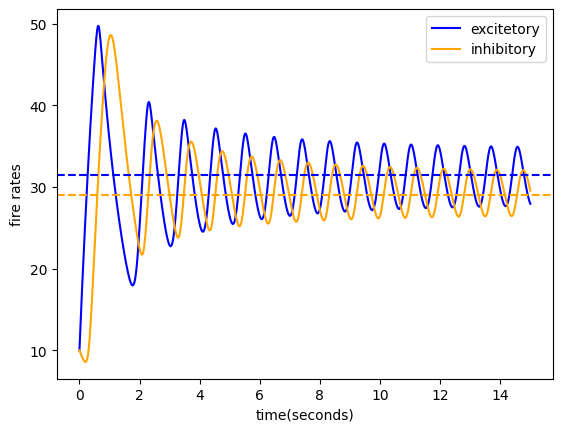

In [20]:
plt.plot(time_points, solution[:, 0], label='excitetory',color = 'blue' )
plt.plot(time_points, solution[:, 1], label='inhibitory',color = 'orange' )
plt.xlabel('time(seconds)')
plt.ylabel('fire rates')
plt.axhline(y=x_star,color = 'blue' , linestyle='--')
plt.axhline(y=y_star, color = 'orange' , linestyle='--')
plt.legend()
plt.show()